In [1]:
!pip install pandas nltk textblob vaderSentiment matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [47]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [41]:
# Example: upload your CSV in Colab and give path
df = pd.read_csv("/content/sentiment-analysis.csv")
df.head()


,"Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [42]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Rename the first column to 'text' (safe fix)
df.rename(columns={df.columns[0]: 'text'}, inplace=True)


In [44]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()   # convert to string to avoid errors
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [48]:
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()


,text,clean_text
0,"""I love this product!"", Positive, Twitter, 202...",love product positive twitter 20230615 092314 ...
1,"""The service was terrible."", Negative, Yelp Re...",service terrible negative yelp reviews 2023061...
2,"""This movie is amazing!"", Positive, IMDb, 2023...",movie amazing positive imdb 20230615 141022 mo...
3,"""I'm so disappointed with their customer suppo...",im disappointed customer support negative onli...
4,"""Just had the best meal of my life!"", Positive...",best meal life positive tripadvisor 20230616 0...


In [49]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_text'].apply(get_polarity)


In [50]:
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(classify_sentiment)
df.head()


,text,clean_text,polarity,sentiment
0,"""I love this product!"", Positive, Twitter, 202...",love product positive twitter 20230615 092314 ...,0.287879,Positive
1,"""The service was terrible."", Negative, Yelp Re...",service terrible negative yelp reviews 2023061...,-0.650000,Negative
2,"""This movie is amazing!"", Positive, IMDb, 2023...",movie amazing positive imdb 20230615 141022 mo...,0.413636,Positive
3,"""I'm so disappointed with their customer suppo...",im disappointed customer support negative onli...,-0.525000,Negative
4,"""Just had the best meal of my life!"", Positive...",best meal life positive tripadvisor 20230616 0...,0.613636,Positive


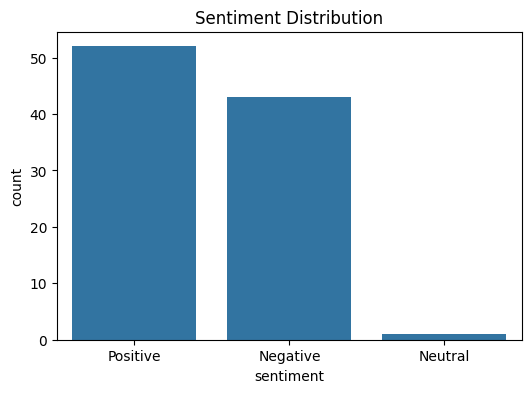

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


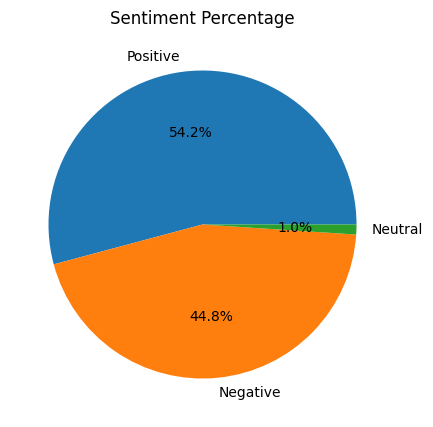

In [52]:
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(5,5),
    title="Sentiment Percentage"
)
plt.ylabel("")
plt.show()


In [53]:
df[['text', 'polarity', 'sentiment']].head(10)


,text,polarity,sentiment
0,"""I love this product!"", Positive, Twitter, 202...",0.287879,Positive
1,"""The service was terrible."", Negative, Yelp Re...",-0.650000,Negative
2,"""This movie is amazing!"", Positive, IMDb, 2023...",0.413636,Positive
3,"""I'm so disappointed with their customer suppo...",-0.525000,Negative
4,"""Just had the best meal of my life!"", Positive...",0.613636,Positive
5,"""The quality of this product is subpar."", Nega...",-0.300000,Negative
6,"""I can't stop listening to this song. It's inc...",0.563636,Positive
7,"""Their website is so user-friendly. Love it!"",...",0.363636,Positive
8,"""I loved the movie! It was fantastic!"", Positi...",0.365909,Positive
9,"""The customer service was terrible."", Negative...",-0.650000,Negative


In [54]:
analyzer = SentimentIntensityAnalyzer()

def vader_score(text):
    return analyzer.polarity_scores(text)['compound']

df['vader_polarity'] = df['clean_text'].apply(vader_score)
df['vader_sentiment'] = df['vader_polarity'].apply(classify_sentiment)

df[['text', 'polarity', 'sentiment', 'vader_polarity', 'vader_sentiment']].head(10)


,text,polarity,sentiment,vader_polarity,vader_sentiment
0,"""I love this product!"", Positive, Twitter, 202...",0.287879,Positive,0.8316,Positive
1,"""The service was terrible."", Negative, Yelp Re...",-0.650000,Negative,-0.7783,Negative
2,"""This movie is amazing!"", Positive, IMDb, 2023...",0.413636,Positive,0.8126,Positive
3,"""I'm so disappointed with their customer suppo...",-0.525000,Negative,-0.6249,Negative
4,"""Just had the best meal of my life!"", Positive...",0.613636,Positive,0.8316,Positive
5,"""The quality of this product is subpar."", Nega...",-0.300000,Negative,-0.4588,Negative
6,"""I can't stop listening to this song. It's inc...",0.563636,Positive,0.6986,Positive
7,"""Their website is so user-friendly. Love it!"",...",0.363636,Positive,0.8316,Positive
8,"""I loved the movie! It was fantastic!"", Positi...",0.365909,Positive,0.9022,Positive
9,"""The customer service was terrible."", Negative...",-0.650000,Negative,-0.7783,Negative
